# AI for Tomorrow
This Notebook was made for a talk for https://www.aifortomorrow.co

![](affiche_bco_ai4tm.jpeg)

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data preparation

In this talk we will see :
- Why we need to prepare data ?
- Two main data preparation process
- Data augmentation
- Generate fake data
- Pseudonymization
- Train, test, validation
- Warning about bias

## Why we need to prepare data ?

A general point :

Artificial Intelligence is still very stupid and machine will learn in a very basic way from the data you give to it.
The better you prepare data, the better it will learn.

In a technical way :

Majority of model only handle numerical value and will perform well only if all the data have the same scale, commonly float between 0 and 1.

## Two main data preparation process

- Data Wrangling / Munging : the goal is to obtain clean data, in a human point of view. 
- Data Pre Processing : Here we prepare the data for machine learning algorithms.



# Data Wrangling / Munging



#### Gather data

The first step is to get data. Sometime you get a CSV, sometime you have to make the dataset yourself.

#### Explore data

Please read the paper "Tidy Data" from "Hadley Wickham" in "Journal of Statistical Software" for more infos : https://vita.had.co.nz/papers/tidy-data.pdf

Check the quality, ie the content itself is good
Check the Tidiness, ie the data is well formated:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

Take notes of what you see.

#### Cleaning

Never do a manual cleaning : you may forget it when you receive new data.

Write you code in a way you could reproduce it anytime in the same order.

Jupyter Lab and Pandas are realy useful for this step : https://github.com/trancept/coding_cheat_sheets/blob/master/Pandas_Tips.ipynb

Often check if everything is ok.

#### Store
Save the new data


## Don't forget external data

Your dataset is now perfect but is is enought to make a model learn from it ?

For example you have a dataset of historical selling of ice-cream of a store. Maybe adding the weather of the day could help the model predict selling ?

# Data Pre-Processing

So you have a clean dataset but for machine learning you need to do more.

Majority of model only handle numerical value and will perform well only if all the data have the same scale, commonly float between 0 and 1.

For the previous step Pandas was a good tool, here we are more in the field of Sci-kit Learn.

## Feature selection

You need to keep only the feature/column/variable that make sens. Too much data is not good. At least for the beginning.

You could get "feature importance" from model to know how each feature contribute to the result.

## Fix missing value and outliers

Instead of deleting rows with missing values you could replace the missing values with the mean of the columns or interpolate the value.

If you can, speak with an expert to understand why there is missing values and outliers. Maybe outliers are real values or maybe it's a default value.

## Feature engineering

You could create new feature from another. The goal is to get a feature with a distibution that will help the model to learn.

A good example is to compute a surface from the dimension of a house.

Looking at the shape of the data maybe you could help the model with polynomial feature or compute the log... 

![plot_map_data_to_normal](https://scikit-learn.org/stable/_images/sphx_glr_plot_map_data_to_normal_001.png)
[Source](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html)

## Onehot encoding

## Feature scaling



# Data augmentation

Data augmentation is a way to feed an algorithm with more data that we really have. It help the models to better generalize to new data.

For exemple with images you could make copy with rotation, cropping, mirroring, adding fog and so on.

![Data augmentation](https://miro.medium.com/max/700/1*aE2kvL2QR6VrdcQktSdx2w.png)
[Source](https://medium.com/@pierre_guillou/data-augmentation-par-fastai-v1-e2e69e071ccc)

FastAI is a good librairy to do that fo you : https://docs.fast.ai/vision.transform.html

For sound you could change the speed, the pitch and add background noise.

## Generate fake data

It could be useful for begining the project before having access to the final data, but also for checking if your pipeline is OK.

You could generate data that is much 'cleaner' than you real data to test if your pipeline works in the best case scenario.

It's more easy with tabular data but you could make fake images with Open CV.

Basic tool is the random generator.

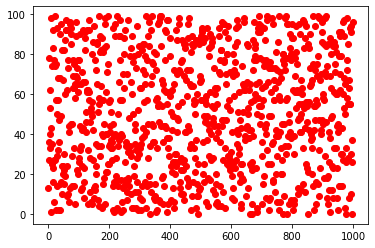

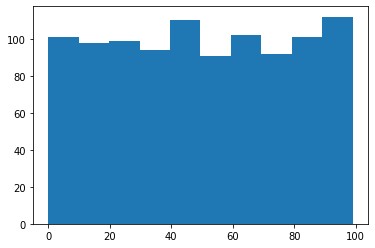

In [4]:
import random
import matplotlib.pyplot as plt
data = [random.randrange(0,100,1) for i in range(1_000)]
plt.plot(data, 'ro');
plt.show();
plt.hist(data);

As you see it produce a uniform distribution, but for many things the distribution is not uniform in reality, it's more like a gaussian / Bell curve, clled "normal distribution".

Numpy has the tools to get random numbers that follow normal distribution.

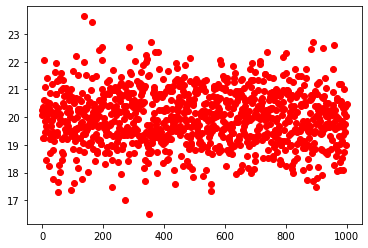

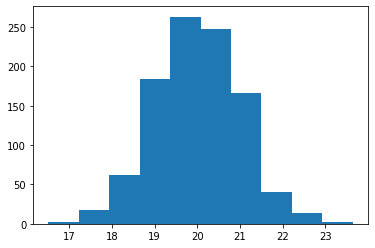

In [5]:
import numpy as np

desired_mean = 20
desired_std_dev = 1
sample_number = 1_000
data = np.random.normal(desired_mean, desired_std_dev, sample_number)
plt.plot(data, 'ro');
plt.show();
plt.hist(data);

With some math you could give the data looks like what you expect to get in reality.

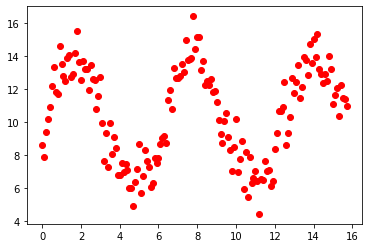

In [6]:
from numpy.random import default_rng
x = np.arange(0,5*np.pi,0.1)
randoms = default_rng().standard_normal(x.shape[0])
y = np.add(np.sin(x)*4, randoms) +10
plt.plot(x,y, 'ro');

Sci-kit Learn have dedicated tool to generate fake datasets : see "Samples generator" section of https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

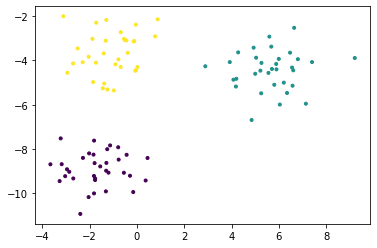

In [33]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=40)
plt.scatter(X[:, 0], X[:, 1], marker='.', c=Y);

### Ready to use tools
Coding is great but don't forget to check ready to use tools like https://www.generatedata.com/

# Final advices

## Keep your pipeline clean

Using interrative tools like Notebooks is good but keep your process as clean as possible.

Take a look at [NBDev](https://nbdev.fast.ai/tutorial/) to make clean code from notebooks.

## Data Privacy and pseudonymization

Don't forget to take care of personnal data and keep GDPR in mind.

Replace real names by fake names as soon as you can.

## Warning about bias

Bias, in the sens of introducing bias in data, is a complex problem. You have to be sure of the diversity of your data, in many ways. For exemple for images you not only have to ensure that you took pictures of diverse subjects, but also in different angle and ligthning. and even with different camera because if you took cat pictures with an iPhone X and dog pictures with Samsung S20 your model may learn how to differenciate iPhone from S20 and not dog from cat.

You need to think constantly about it. Because you could introduce it many times and in many way : in the raw data or when you split the dataset for machine learning.

## Never think you are done

I encourage you to spend a small time on each step to quickly get a working pipeline and get a baseline, then you could iterate and improve and saw what improve your baseline. So you will spend time on what matter.